In [1]:

import tkinter as tk
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import pickle
from joblib import Parallel, delayed
import joblib

In [2]:
file = pd.read_csv(r"K:\PROGRAMS\PYTHON\UAPS\UAPS---UNIVERSITY_ADMISSION_PREDICTION_SYSTEM\admission_data.csv")
file.rename(columns={'Chance of Admit ': 'Chance of Admit'}, inplace=True)


In [3]:
file[file["Chance of Admit"] >= 0.9]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
5,330,115,5,4.5,3.0,9.34,1,0.90
22,328,116,5,5.0,5.0,9.50,1,0.94
23,334,119,5,5.0,4.5,9.70,1,0.95
24,336,119,5,4.0,3.5,9.80,1,0.97
...,...,...,...,...,...,...,...,...
446,327,118,4,5.0,5.0,9.67,1,0.93
452,328,116,4,5.0,3.5,9.60,1,0.93
472,327,116,4,4.0,4.5,9.48,1,0.90
496,337,117,5,5.0,5.0,9.87,1,0.96


<Axes: >

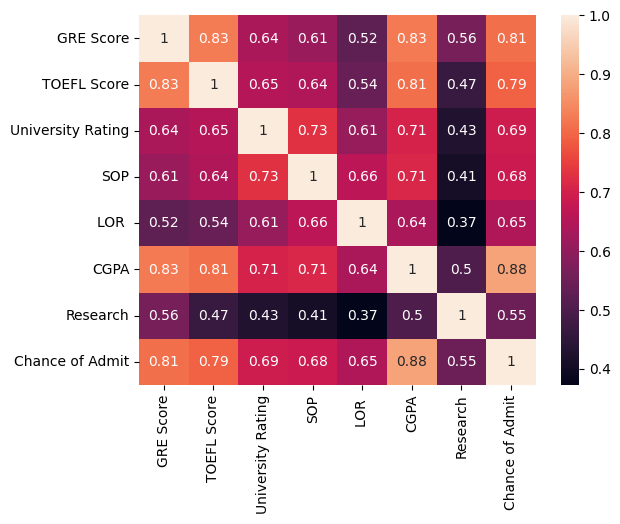

In [4]:
sb.heatmap(file.corr(), annot=True)

PREDICT CHANCE OF ADMISSION IN UNIVERSITY

In [5]:
Chance_of_admit = pd.DataFrame(file["Chance of Admit"])
GRE_Score = pd.DataFrame(file["GRE Score"])
mod_file = file.drop(["Chance of Admit"], axis="columns")
mod_file

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


MODEL CREATION

In [6]:
X_train, X_test, y_train, y_test = train_test_split(mod_file, Chance_of_admit, random_state=25)

In [7]:
md = LinearRegression()
md.fit(X_train, y_train)
acc = md.score(X_test, y_test)
y_pred = md.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print("Accuracy =", acc)
print("MSE =", mse)

Accuracy = 0.8480697386952706
MSE = 0.0031985340687080703


In [8]:
kf = KFold(n_splits=200)

scores_linear = [0]
scores_logistic = [0]
scores_svm = [0]
scores_rf = [0]

def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

f_X_train, f_X_test, f_y_train, f_y_test = 0, 0, 0, 0
for train_index, test_index in kf.split(mod_file):
    X_train, X_test, y_train, y_test = mod_file.loc[train_index], mod_file.loc[
        test_index], Chance_of_admit.loc[train_index], Chance_of_admit.loc[test_index]
    res = round(get_score(LinearRegression(), X_train,
                          X_test, y_train, y_test)*100, 2)
    if res > max(scores_linear):
        f_X_train, f_X_test, f_y_train, f_y_test = X_train, X_test, y_train, y_test
    scores_linear.append(res)
    
model1 = LinearRegression()
model1.fit(f_X_train, f_y_train)

y_pred = model1.predict(f_X_test)
mse = mean_squared_error(f_y_test,y_pred)

print("Accuracy =", round(model1.score(f_X_test, f_y_test)*100, 2))
print("MSE =", mse)

Accuracy = 99.67
MSE = 3.963439898030503e-05


In [9]:
arr = [[340,120,1,1,1,9.5,0]]

In [10]:
print("Linear Regression =", round(md.predict(arr)[0][0]*100, 2))
print("LinearRegression with K Fold =", round(model1.predict(arr)[0][0]*100, 2))

Linear Regression = 82.45
LinearRegression with K Fold = 83.88


C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


SAVE MODEL 1

In [11]:
joblib.dump(model1, 'UAPS1.pkl')
savedModel1 = joblib.load('UAPS1.pkl')
savedModel1.predict(f_X_test)

array([[0.72814878],
       [0.93641305]])

GRAPH FOR CHANCE OF ADMISSION IN UNIVERSITY

In [12]:
# # d= {"GRE":319,"TOEFL":110,"University":3, "SOP":3.0,"LOR":2.5,"CGPA":8.79,"Research":0}
# # # d= {"GRE":332,"TOEFL":118,"University":5, "SOP":5.0,"LOR":5.0,"CGPA":9.47,"Research":1}
# df = pd.DataFrame({
#     'X': ["GRE","TOEFL","SOP","LOR","CGPA"],
#     'Y': [332,118,5.0,5.0,9.47],
#     'Z': [319,110,3.0,2.5,8.79]
# })

# ax = plt.subplots()

# # plotting columns
# ax = plt.bar(df["X"], df["Y"], width = 0.4)
# ax = plt.bar(df["X"]+0.4, df["Z"], width = 0.4)

# # renaming the axes
# plt.xlabel("")
# # visualizing illustration
# plt.show()


PREDICT HOW MUCH SCORES NEEDED TO GET INTO SPECIFIED RATING UNIVERSITY

In [13]:
file = pd.read_csv("admission_data.csv")
file.rename(columns={'Chance of Admit ': 'Chance of Admit'}, inplace=True)
U_rating = file["University Rating"]
mod_file_1 = file.drop(["Chance of Admit", "University Rating"], axis="columns")
mod_file_1.head(10)

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research
0,337,118,4.5,4.5,9.65,1
1,324,107,4.0,4.5,8.87,1
2,316,104,3.0,3.5,8.00,1
3,322,110,3.5,2.5,8.67,1
4,314,103,2.0,3.0,8.21,0
5,330,115,4.5,3.0,9.34,1
6,321,109,3.0,4.0,8.20,1
7,308,101,3.0,4.0,7.90,0
8,302,102,2.0,1.5,8.00,0
9,323,108,3.5,3.0,8.60,0


In [14]:
kf = KFold(n_splits=200)

scores_linear = [0]
scores_logistic = [0]
scores_svm = [0]
scores_rf = [0]

def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train.reshape(-1, 1), y_train)
    return model.score(X_test.reshape(-1, 1), y_test)

f_X_train, f_X_test, f_y_train, f_y_test = 0, 0, 0, 0
for train_index, test_index in kf.split(U_rating):
    X_train, X_test, y_train, y_test = np.array(U_rating.loc[train_index]), np.array(
        U_rating.loc[test_index]), np.array(mod_file_1.loc[train_index]), np.array(mod_file_1.loc[test_index])
    res = round(get_score(LinearRegression(), X_train,
                          X_test, y_train, y_test)*100, 2)
    if res > max(scores_linear):
        f_X_train, f_X_test, f_y_train, f_y_test = X_train, X_test, y_train, y_test
        scores_linear.append(res)

f_X_train, f_X_test, f_y_train, f_y_test = pd.DataFrame(f_X_train), pd.DataFrame(f_X_test), pd.DataFrame(f_y_train), pd.DataFrame(f_y_test)

model2 = LinearRegression()
model2.fit(f_X_train, f_y_train)

y_pred = model2.predict(f_X_test)
mse = mean_squared_error(f_y_test,y_pred)

print("Accuracy =", round(model2.score(f_X_test, f_y_test)*100, 2))
print("MSE =", mse)

Accuracy = 86.5
MSE = 9.174237488958195


SAVE MODEL 2

In [15]:
joblib.dump(model2, 'UAPS2.pkl')
savedModel2 = joblib.load('UAPS2.pkl')
savedModel2.predict(f_X_test)

array([[328.23145128, 113.69993427,   4.5641997 ,   4.40868562,
          9.28056666,   0.90885924],
       [309.50614467, 103.34493235,   2.67173762,   2.93573209,
          8.16005965,   0.35477871]])